In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 30kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=55b4e10e54a167e118597a610dc8b1e371e247d24ad7abbe28146efb935c9b84
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import sys
import os
import cv2
import tensorflow as tf
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.resnet50 import preprocess_input
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import dlib
import face_recognition

In [4]:
!git clone https://github.com/shyamsundar233/MaskDetection---ResNet50.git

Cloning into 'MaskDetection---ResNet50'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [5]:
sys.path.insert(0,'/content/MaskDetection---ResNet50')

from traindataset import training_dataset
from resnet50 import ResNet50

In [6]:
train_path = '/content/drive/MyDrive/Datasets/maskdata/maskdata/train'
test_path = '/content/drive/MyDrive/Datasets/maskdata/maskdata/test'
validation_path = '/content/drive/MyDrive/Datasets/maskdata/maskdata/validation1'

CLASSES=['GOOD! YOU ARE SAFE!!','PLEASE!! WEAR YOUR MASK!']

In [7]:
train_dataset,test_dataset = training_dataset(train_path,test_path)

Found 370 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [8]:
model = ResNet50(input_shape=(224,224,3),classes=2)
  
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
clear_output()

In [9]:
model.fit(train_dataset,
          epochs=20,
          batch_size=32)

val_loss,val_acc = model.evaluate(train_dataset)
print(val_loss,val_acc)

Epoch 1/20
12/12 [==============================] - 111s 7s/step - loss: 24.1951 - accuracy: 0.5162
Epoch 2/20
12/12 [==============================] - 5s 387ms/step - loss: 2.3835 - accuracy: 0.7595
Epoch 3/20
12/12 [==============================] - 5s 390ms/step - loss: 1.1857 - accuracy: 0.8622
Epoch 4/20
12/12 [==============================] - 5s 385ms/step - loss: 1.8496 - accuracy: 0.8135
Epoch 5/20
12/12 [==============================] - 5s 389ms/step - loss: 1.6240 - accuracy: 0.8459
Epoch 6/20
12/12 [==============================] - 5s 391ms/step - loss: 0.7032 - accuracy: 0.9054
Epoch 7/20
12/12 [==============================] - 5s 388ms/step - loss: 0.5071 - accuracy: 0.9270
Epoch 8/20
12/12 [==============================] - 5s 390ms/step - loss: 0.3808 - accuracy: 0.9432
Epoch 9/20
12/12 [==============================] - 5s 390ms/step - loss: 0.2759 - accuracy: 0.9378
Epoch 10/20
12/12 [==============================] - 5s 389ms/step - loss: 0.4320 - accuracy: 0.9162

-------------------------------------------------------------------------------------------------------------------


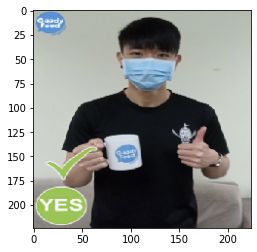


GOOD! YOU ARE SAFE!!
-------------------------------------------------------------------------------------------------------------------


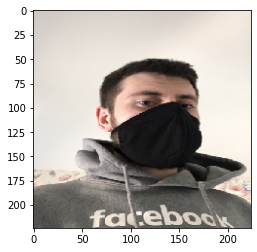


PLEASE!! WEAR YOUR MASK!
-------------------------------------------------------------------------------------------------------------------


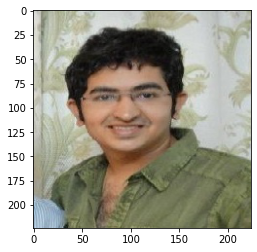


PLEASE!! WEAR YOUR MASK!
-------------------------------------------------------------------------------------------------------------------


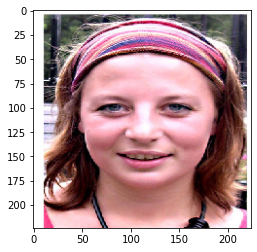


PLEASE!! WEAR YOUR MASK!
-------------------------------------------------------------------------------------------------------------------


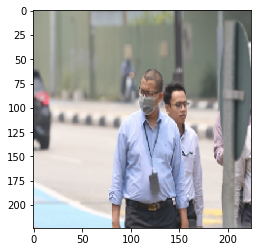


GOOD! YOU ARE SAFE!!


In [13]:
path = '/content/drive/MyDrive/Datasets/maskdata/maskdata/validation1/validphotos'

for i in os.listdir(path):
  p = path + '/' + i
  img = load_img(p,target_size=(224,224))
  x = img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  out = model.predict(x)
  prediction = (int) (out[0][1])
  print("-------------------------------------------------------------------------------------------------------------------")
  plt.imshow(img)
  plt.show()
  print()
  print(CLASSES[0]) if (prediction==0)  else print(CLASSES[1])

# **With Face Recognition**

-------------------------------------------------------------------------------------------------------------------
PLEASE!! WEAR YOUR MASK!


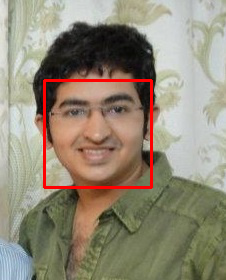

In [39]:
from google.colab.patches import cv2_imshow

p = '/content/drive/MyDrive/Datasets/maskdata/maskdata/validation1/validphotos/Copy of 53.jpg'
img = load_img(p,target_size=(224,224))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
out = model.predict(x)
prediction = (int) (out[0][1])
print("-------------------------------------------------------------------------------------------------------------------")
if (prediction==0):
  print(CLASSES[0])
  img1 = face_recognition.load_image_file(p)
  img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
  faceLoc = face_recognition.face_locations(img1)[0]
  a,b,c,d = faceLoc
  faceEncode = face_recognition.face_encodings(img1)[0]
  cv2.rectangle(img1,(int (d),int (a)),(int (b),int (c)),(0,0,255),2)
  cv2_imshow(img1)
else:
  print(CLASSES[1])
  img1 = face_recognition.load_image_file(p)
  img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
  faceLoc = face_recognition.face_locations(img1)[0]
  a,b,c,d = faceLoc
  faceEncode = face_recognition.face_encodings(img1)[0]
  cv2.rectangle(img1,(int (d),int (a)),(int (b),int (c)),(0,0,255),2)
  cv2_imshow(img1)